In [41]:
# Traing a random forest classification model to identify potent and non-potent siRNA molecules for gene silencing

import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the training data
trainfile = 'training_features.csv'

all_data = np.loadtxt(trainfile, delimiter=',', dtype=str)
headers = all_data[0,:] # All the feature headers
feature_list = headers[0:len(headers)-2] # Get the names of all the features (all but the last two columns that correspond to activity and potency)
feature_list = feature_list.tolist()

# Get the feature values
train_data = all_data[1:,0:len(headers)].astype(float)
r1,c1 = np.shape(train_data)
train_labels = train_data[:,c1-1] # The POTENTYN column
train_features = train_data[:,0:c1-2] # All columns except the last 2 that correspond to activity and potency label

num_jobs = -1 # Change this based on your requirement. -1 means use all the available processors.
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=num_jobs) # Train a random forest classifier with 100 trees
rf.fit(train_features, train_labels)
importances = list(rf.feature_importances_)


In [42]:
# Make predictions on the test data
testfile = 'test_features.csv'
test_data = np.loadtxt(testfile, delimiter=',', skiprows=1, dtype=float)
r2,c2 = np.shape(test_data)
test_labels = test_data[:,c2-1] # The POTENTYN column
test_features = test_data[:,0:c2-2] # All columns except the last 2 
test_predictions = rf.predict(test_features)

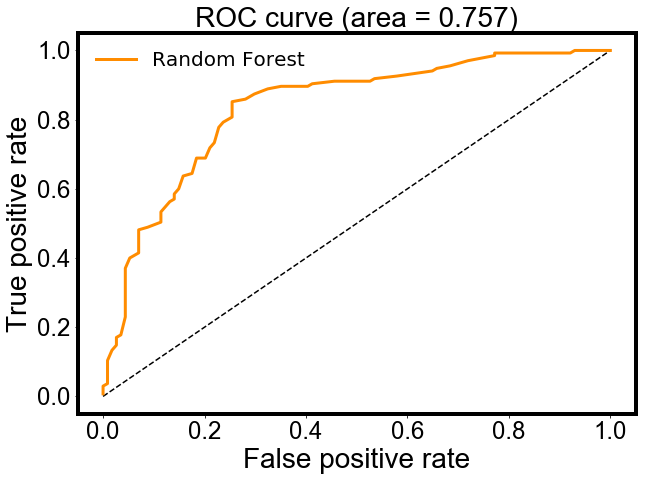

AUC = 0.757 
F1 score = 0.7644787644787644 
Mean-squared error = 0.24497991967871485 
Accuracy = 0.7550200803212851 
Matthews correlation coefficient = 0.5122078445915491


In [43]:
# Calculate the performance using all the features
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
import matplotlib.pyplot as plt

# Calculate and plot the AUC
test_predicted_scores = rf.predict_proba(test_features)[:, 1]
false_positive, true_positive, _ = roc_curve(test_labels, test_predicted_scores)
auc_test = roc_auc_score(test_labels, test_predictions)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest', lw=3)
plt.xlabel('False positive rate', fontsize=28, fontname='Arial')
plt.ylabel('True positive rate', fontsize=28, fontname='Arial')
plt.xticks(fontsize=24, fontname='Arial')
plt.yticks(fontsize=24, fontname='Arial')
plt.title('ROC curve (area = %0.3f)' % auc_test, fontsize=28, fontname='Arial')
plt.legend(loc='best', frameon=False, fontsize=20)
plt.show()

# Calculate the F1 score
F1_score_test = f1_score(test_labels, test_predictions)

# Calculate the mean-squared error
mse_test = mean_squared_error(test_labels, test_predictions)

# Calculate the accuracy
accuracy_test = accuracy_score(test_labels, test_predictions)

# Calculate the MCC
mcc_test = matthews_corrcoef(test_labels, test_predictions)

auc_test
# Print the performance metrics on test data
print ("AUC =", round(auc_test, 3), "\nF1 score =", F1_score_test, "\nMean-squared error =", mse_test, "\nAccuracy =", accuracy_test, "\nMatthews correlation coefficient =", mcc_test)



In [44]:
# Get the feature importances and plot the performance with the top N important features
importances = list(rf.feature_importances_)
important_indices = np.argsort(np.array(importances))[::-1]

top_max = 559 # Total number of features
AUC_list = []
MCC_list = []
F1_list = []
acc_list = []
for n_feat in range(1,top_max+1):
    print ("Running predictions with top ", n_feat, " important feature(s)...", end='')
    train_important = train_features[:, important_indices[0:n_feat]]
    test_important = test_features[:, important_indices[0:n_feat]]
    rf.fit(train_important, train_labels)
    test_predictions_n_feat = rf.predict(test_important)
    
    # Calculate the AUCs
    test_predicted_scores = rf.predict_proba(test_important)[:, 1]
    false_positive, true_positive, _ = roc_curve(test_labels, test_predicted_scores)
    auc_test_n_feat = roc_auc_score(test_labels, test_predictions_n_feat)
    AUC_list.append(auc_test_n_feat)
    
    # Calculate the MCCs
    mcc_test_n_feat = matthews_corrcoef(test_labels, test_predictions_n_feat)
    MCC_list.append(mcc_test_n_feat)
    
    # Calculate the F1 scores
    F1_score_test_n_feat = f1_score(test_labels, test_predictions_n_feat)
    F1_list.append(F1_score_test_n_feat)
    
    # Calculate the accuracies
    accuracy_test_n_feat = accuracy_score(test_labels, test_predictions_n_feat)
    acc_list.append(accuracy_test_n_feat)
    
    print("Done!")

Running predictions with top  1  important feature(s)...Done!
Running predictions with top  2  important feature(s)...Done!
Running predictions with top  3  important feature(s)...Done!
Running predictions with top  4  important feature(s)...Done!
Running predictions with top  5  important feature(s)...Done!
Running predictions with top  6  important feature(s)...Done!
Running predictions with top  7  important feature(s)...Done!
Running predictions with top  8  important feature(s)...Done!
Running predictions with top  9  important feature(s)...Done!
Running predictions with top  10  important feature(s)...Done!
Running predictions with top  11  important feature(s)...Done!
Running predictions with top  12  important feature(s)...Done!
Running predictions with top  13  important feature(s)...Done!
Running predictions with top  14  important feature(s)...Done!
Running predictions with top  15  important feature(s)...Done!
Running predictions with top  16  important feature(s)...Done!
R

Running predictions with top  130  important feature(s)...Done!
Running predictions with top  131  important feature(s)...Done!
Running predictions with top  132  important feature(s)...Done!
Running predictions with top  133  important feature(s)...Done!
Running predictions with top  134  important feature(s)...Done!
Running predictions with top  135  important feature(s)...Done!
Running predictions with top  136  important feature(s)...Done!
Running predictions with top  137  important feature(s)...Done!
Running predictions with top  138  important feature(s)...Done!
Running predictions with top  139  important feature(s)...Done!
Running predictions with top  140  important feature(s)...Done!
Running predictions with top  141  important feature(s)...Done!
Running predictions with top  142  important feature(s)...Done!
Running predictions with top  143  important feature(s)...Done!
Running predictions with top  144  important feature(s)...Done!
Running predictions with top  145  impor

Running predictions with top  258  important feature(s)...Done!
Running predictions with top  259  important feature(s)...Done!
Running predictions with top  260  important feature(s)...Done!
Running predictions with top  261  important feature(s)...Done!
Running predictions with top  262  important feature(s)...Done!
Running predictions with top  263  important feature(s)...Done!
Running predictions with top  264  important feature(s)...Done!
Running predictions with top  265  important feature(s)...Done!
Running predictions with top  266  important feature(s)...Done!
Running predictions with top  267  important feature(s)...Done!
Running predictions with top  268  important feature(s)...Done!
Running predictions with top  269  important feature(s)...Done!
Running predictions with top  270  important feature(s)...Done!
Running predictions with top  271  important feature(s)...Done!
Running predictions with top  272  important feature(s)...Done!
Running predictions with top  273  impor

Running predictions with top  386  important feature(s)...Done!
Running predictions with top  387  important feature(s)...Done!
Running predictions with top  388  important feature(s)...Done!
Running predictions with top  389  important feature(s)...Done!
Running predictions with top  390  important feature(s)...Done!
Running predictions with top  391  important feature(s)...Done!
Running predictions with top  392  important feature(s)...Done!
Running predictions with top  393  important feature(s)...Done!
Running predictions with top  394  important feature(s)...Done!
Running predictions with top  395  important feature(s)...Done!
Running predictions with top  396  important feature(s)...Done!
Running predictions with top  397  important feature(s)...Done!
Running predictions with top  398  important feature(s)...Done!
Running predictions with top  399  important feature(s)...Done!
Running predictions with top  400  important feature(s)...Done!
Running predictions with top  401  impor

Running predictions with top  514  important feature(s)...Done!
Running predictions with top  515  important feature(s)...Done!
Running predictions with top  516  important feature(s)...Done!
Running predictions with top  517  important feature(s)...Done!
Running predictions with top  518  important feature(s)...Done!
Running predictions with top  519  important feature(s)...Done!
Running predictions with top  520  important feature(s)...Done!
Running predictions with top  521  important feature(s)...Done!
Running predictions with top  522  important feature(s)...Done!
Running predictions with top  523  important feature(s)...Done!
Running predictions with top  524  important feature(s)...Done!
Running predictions with top  525  important feature(s)...Done!
Running predictions with top  526  important feature(s)...Done!
Running predictions with top  527  important feature(s)...Done!
Running predictions with top  528  important feature(s)...Done!
Running predictions with top  529  impor

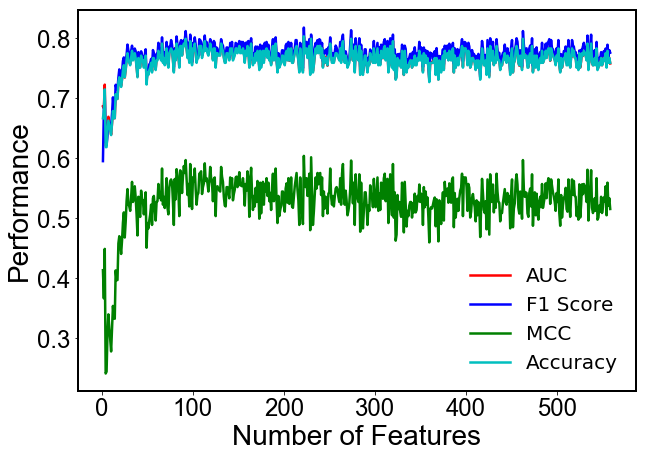

In [45]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(10,7))
plt.plot(list(range(1,len(AUC_list)+1)), AUC_list, 'r', label='AUC', lw=2.5)
plt.plot(list(range(1,len(F1_list)+1)), F1_list, 'b', label='F1 Score', lw=2.5)
plt.plot(list(range(1,len(MCC_list)+1)), MCC_list, 'g', label='MCC', lw=2.5)
plt.plot(list(range(1,len(acc_list)+1)), acc_list, 'c', label='Accuracy', lw=2.5)
plt.xlabel('Number of Features', fontsize=28, fontname='Arial')
plt.ylabel('Performance', fontsize=28, fontname='Arial')
plt.xticks(fontsize=24, fontname='Arial')
plt.yticks(fontsize=24, fontname='Arial')
plt.legend(frameon=False, fontsize=20)

In [52]:
max_mcc_ind = MCC_list.index(max(MCC_list[0:100])) # Get the number of features in the top 100 where we observe maximum MCC
print ("Max MCC observed with top", max_mcc_ind+1, "features")
print ("Max MCC =", round(MCC_list[max_mcc_ind],3))

# Print the other statistics
print ("\n***Performance metrics with top ", max_mcc_ind+1, "features***")
print ("AUC =", AUC_list[max_mcc_ind], "\nF1 score =", F1_list[max_mcc_ind], "\nAccuracy =", acc_list[max_mcc_ind] )

Max MCC observed with top 92 features
Max MCC = 0.597

***Performance metrics with top  92 features***
AUC = 0.7991228070175439 
F1 score = 0.81203007518797 
Accuracy = 0.7991967871485943


Text(0,0.5,'Importance')

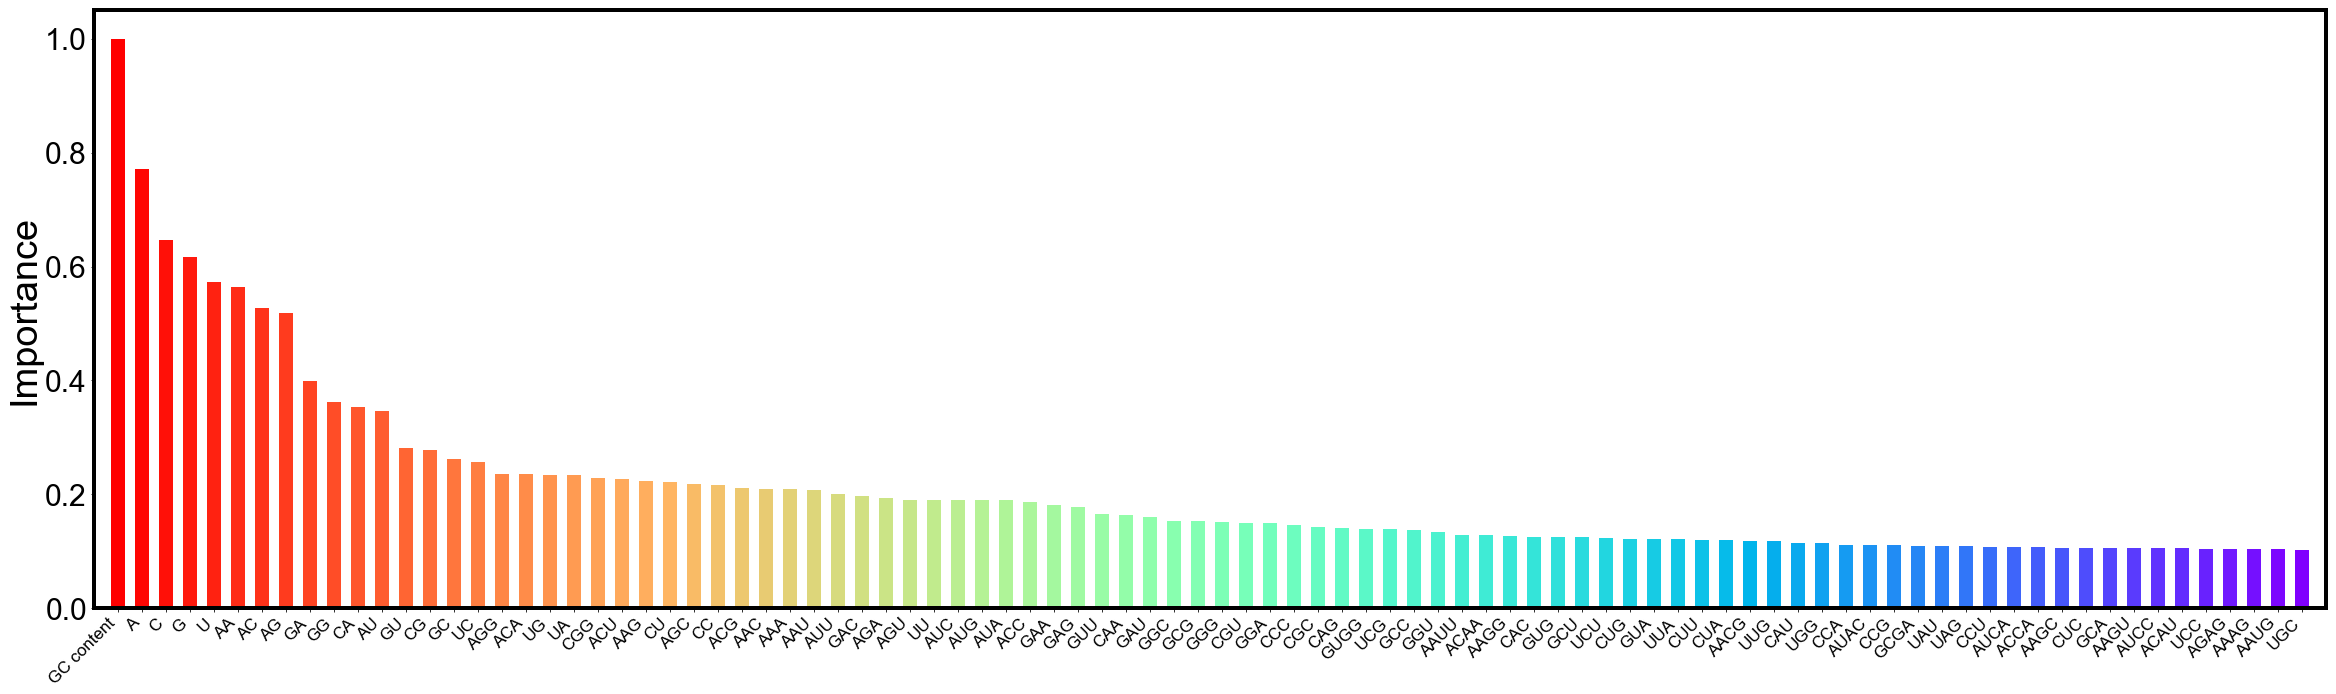

In [62]:
# Plot the importance of top 92 important features. This is the number of features where the performance converges.
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 4

importances = list(rf.feature_importances_)
importances = [round(imp_i,15) for imp_i in importances]
important_indices = np.argsort(np.array(importances))[::-1]

max_features = 92
top_n_features = np.array(feature_list)[important_indices[0:max_features]].tolist()
top_n_importances = np.array(importances)[important_indices[0:max_features]].tolist()

# Rescale from 0 to 1
top_n_importances = [imp_i/max(top_n_importances) for imp_i in top_n_importances]
colors = plt.cm.rainbow_r(np.linspace(0,1,len(top_n_features)))

# Plot the importances
plt.figure(figsize=(40,11)) # Works like a charm!!! 
plt.bar(list(range(1,max_features+1)),top_n_importances, color=colors, width=0.6)
plt.xticks(list(range(1,len(top_n_features)+1)), top_n_features, rotation=45, fontsize=17, fontname='Arial', ha="right")
plt.yticks(fontsize=30, fontname='Arial')
plt.xlim(0,max_features+1)
plt.ylabel('Importance', fontsize=38, fontname='Arial')